In [67]:
import pickle
import scipy.integrate as integrate
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

with open('Gelatin11DecFri.pkl', 'rb') as f: 
    peak_i, g, obj_h, obj_A, delta0, peaks, x, y, xnp, ynp,\
                 deltaz, nn, rate, speed = pickle.load(f)

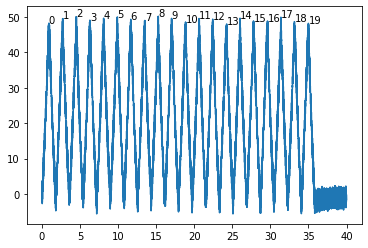

In [68]:
xnp=np.array(x,dtype=np.float32)
ynp=np.array(y,dtype=np.float32)
peaks, _ = find_peaks(y, height=ynp.max()/2., distance=len(y)/2./nn)
plt.plot(xnp, ynp)
for i in range(len(peaks)):
    plt.text(xnp[peaks[i]], ynp[peaks[i]],str(i))

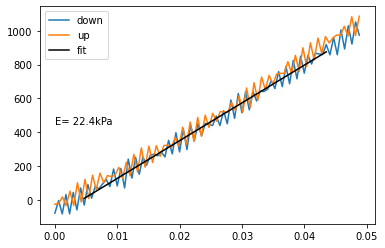

In [70]:

down_start_index=int(peaks[peak_i-1]+(peaks[peak_i]-peaks[peak_i-1])/2.)#find down start index
down_end_index=peaks[peak_i]
up_start_index=peaks[peak_i-1]
down_stroke=ynp[down_start_index:down_end_index]
up_stroke=ynp[up_start_index:down_start_index-1]
down_pos=np.linspace(0,deltaz,len(down_stroke))
up_pos=deltaz-np.linspace(0,deltaz,len(up_stroke))
### Calculate strain 
max_strain,_ = integrate.quad(lambda xx: -1./xx, obj_h-delta0, obj_h-delta0-down_pos[-1])
down_strain = np.linspace(0.,max_strain,len(down_stroke))
up_strain = np.linspace(max_strain, 0.,len(up_stroke))

up_stress=up_stroke*1e-3*g/obj_A
down_stress=down_stroke*1e-3*g/obj_A

#Simple Expression for Elastic Modulus, better by fitting a line to the center and take the slope 
EM0=(down_stress[-1]-down_stress[0])/max_strain
plt.plot(down_strain,down_stress,label='down');
plt.plot(up_strain,up_stress,label='up')
si=int(len(down_strain)*.1)
ei=int(len(down_strain)*.9)
fit=np.polyfit(down_strain[si:ei],down_stress[si:ei],1)
plt.plot(down_strain[si:ei],np.poly1d(fit)(down_strain[si:ei]), label='fit', color='k')
plt.text(0,(down_stress[-1]-down_stress[0])/2.+down_stress[0],"E={:5.1f}kPa".format(fit[0]/1e3))
plt.legend();
